#### 此章节我们使用numpy进行模型训练，实现一个原生的Logistic_Regression

In [4]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

file_path = '../data/raw/breast_cancer_data.csv'
df = pd.read_csv(file_path)

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# feature 
scaler = StandardScaler() # 创建一个特征器
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)\

# to compute ez to transfrom pd.series -> numpy array
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print("Prepare For Next Step ") 

Prepare For Next Step 


#### 01定义logistic 需要的函数
Sigmoid(将数值映射到01区间，输出概率)：<br>
公式为：$$ g(z) = \frac{1}{1 + e^{-z}}$$

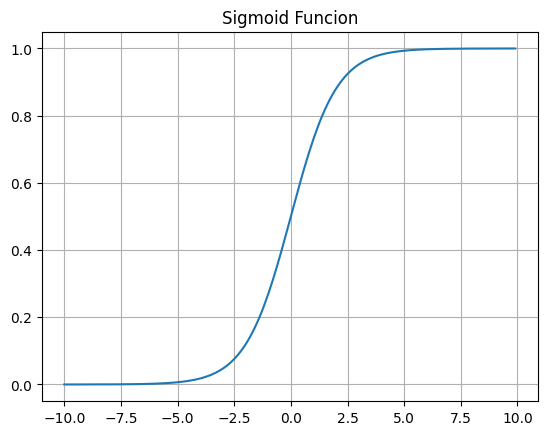

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
# 测试一下函数
import matplotlib.pyplot as plt 
z_tmp = np.arange(-10, 10, 0.1)
y_tmp = sigmoid(z_tmp)
plt.plot(z_tmp, y_tmp)
plt.title('Sigmoid Funcion')
plt.grid(True)
plt.show()

#### 02尝试创建一个类似sklearn的库，“面向对象”，将所有逻辑封装到这个类中

In [6]:
class MyLogisticRegression:
    # 使用numpy从零实现一个逻辑回归
    
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None 
        self.bias = None 
        
    def fit(self, X, y):
        # 01_初始化模型参数
        n_samples, n_features = X.shape 
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # 02_Gradient_Descend
        for _ in range(self.n_iters):
            
            # 线性模型 z = w*x + b
            linear_model = np.dot(X, self.weights) + self.bias
            # apply Sigmoid Function
            y_predicted = sigmoid(linear_model)
            
            # compute Gradient 
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            # update cof 
            self.weights -= self.lr * dw 
            self.bias -= self.lr * db
            
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(linear_model)
        # use 0.5 as bound to predict
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)    

### 03训练和评估

In [8]:
# (a)初始化
my_model = MyLogisticRegression(learning_rate = 0.02, n_iters = 20000)

# (b)training model 
my_model.fit(X_train_scaled, y_train)

# (c)predict 
y_pred_my_model = my_model.predict(X_test_scaled)

# (d)verify
accuracy = accuracy_score(y_test, y_pred_my_model)
print(f"Accuracy{accuracy:.4f}")
print(classification_report(y_test, y_pred_my_model))



Accuracy0.9825
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

